In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

figure_dir = "/home/xin/Dropbox/BrainImaging_ML/multidimensional_age_prediction/figures_robustreg_spmvbm_hc2"
result_dir = "/home/xin/Dropbox/BrainImaging_ML/multidimensional_age_prediction/result_robustreg_spmvbm_hc2"

sns.set(rc={'figure.figsize':(10, 10)}, font_scale = 2)

# coefs_data = pd.read_csv('result_hc2/feature_beta.csv')
# coefs_data = pd.read_csv('result_ridge_robustscale_hc2/feature_beta_ridge.csv')

# with outliers removed:
# coefs_data = pd.read_csv('result_ridge_spmvbm_hc2/feature_beta_ridge.csv')

# without remove outliers and robustscale:
# coefs_data = pd.read_csv('result_ridge_robustscale_spmvbm_hc2/feature_beta_ridge.csv')

# with ransac lr regression:
# coefs_data = pd.read_csv(result_dir+'/feature_beta_huber_reg.csv')
coefs_data = pd.read_csv(result_dir+'/feature_beta_ransac_lr.csv')

rsquare_thresh = .09
coefs_data.loc[coefs_data['Rsquare']<rsquare_thresh, 'cluster'] = 999
coefs_data.loc[coefs_data['Rsquare']>=rsquare_thresh, 'cluster'] = 111

coefs_data_raw = coefs_data.copy()
# coefs_data[['beta1','beta2']] = abs(coefs_data[['beta1','beta2']])

column_label = ['beta1','beta2','beta3', 'beta4', 'beta5']
coefs_data[column_label] = abs(coefs_data[column_label])


coefs_data = coefs_data.astype({'cluster': 'int32'})

peak_age_m = -(coefs_data_raw['beta1']+coefs_data_raw['beta4'])/\
                (2*(coefs_data_raw['beta2']+coefs_data_raw['beta5']))

peak_age_f = -(coefs_data_raw['beta1']-coefs_data_raw['beta4'])/\
                (2*(coefs_data_raw['beta2']-coefs_data_raw['beta5']))

# peak_age_m[peak_age_m>50] = 50
# peak_age_m[peak_age_m<-20] = -20

# peak_age_f[peak_age_f>50] = 50
# peak_age_f[peak_age_f<-20] = -20

coefs_data_raw['peak_age_m'] = peak_age_m
coefs_data_raw['peak_age_f'] = peak_age_f
# sns.distplot(peak_age_m, bins=25, rug = True)
# sns.distplot(peak_age_f, bins=25, rug = True)


In [2]:
coefs_data

,Unnamed: 0,modality,beta1,beta2,beta3,beta4,beta5,Rsquare,cluster
0,Left Precentral,gmv,0.208754,0.000000,0.000000,0.000000,0.000000,-0.839810,999
1,Right Precentral,gmv,0.226059,0.000000,0.000000,0.000000,0.000000,-2.166871,999
2,Left Superior Frontal,gmv,0.209297,0.000000,0.000000,0.000000,0.000000,-1.567512,999
3,Right Superior Frontal,gmv,0.000000,0.000000,0.000000,0.000000,0.000000,-2.762282,999
4,Left Superior Frontal Orbital,gmv,0.424109,0.010257,1.449996,0.195111,0.006199,0.443864,111
...,...,...,...,...,...,...,...,...,...
181,Superior.longitudinal.fasciculus.R,tract_fa,0.414201,0.011749,0.000000,0.000000,0.000000,0.154659,111
182,Uncinate.fasciculus.L,tract_fa,0.428906,0.013228,0.000000,0.000000,0.000000,0.073320,999
183,Uncinate.fasciculus.R,tract_fa,0.382470,0.011427,0.000000,0.000000,0.000000,0.089150,999
184,Superior.longitudinal.fasciculus.(temporal.pa...,tract_fa,0.308657,0.008687,0.000000,0.000000,0.000000,0.020698,999


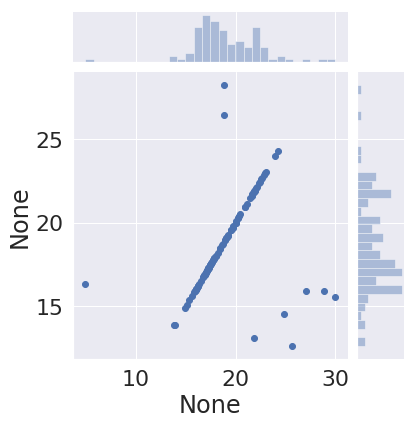

In [3]:
idx = abs(peak_age_m-peak_age_f)<20
sns.jointplot(x=peak_age_m[idx], y=peak_age_f[idx], marginal_kws = {'bins': 30})


In [4]:
print(coefs_data.shape)
print(coefs_data_raw.shape)

(186, 9)
(186, 11)


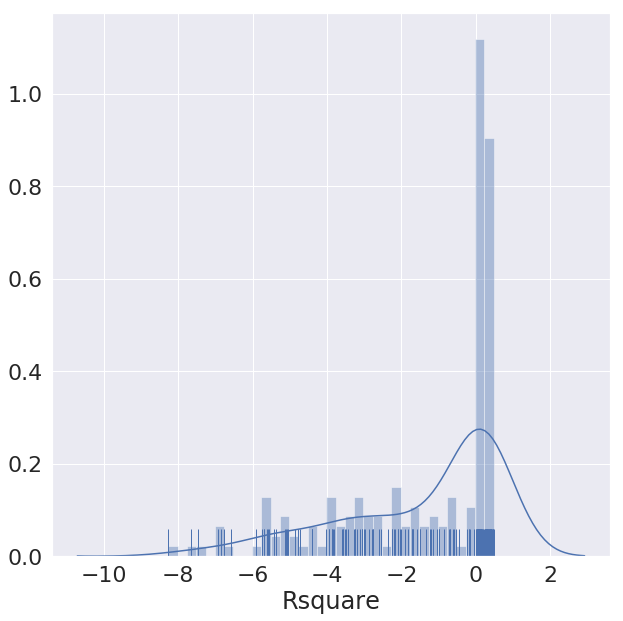

In [5]:
sns.set(rc={'figure.figsize':(10, 10)}, font_scale = 2)
sns.distplot(coefs_data['Rsquare'], bins = 35, rug = True)

In [6]:

# from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

sns.set(rc={'figure.figsize':(10, 10)}, font_scale = 2)


# columns = ['beta1', 'beta2', 'beta4', 'beta5', 'peak_age_f', 'peak_age_m']
# columns = ['beta1', 'beta2', 'beta3', 'beta4', 'beta5']
columns = ['beta1', 'beta2', 'beta4', 'beta5']

cluster_rows = coefs_data['cluster']==111
X_varied = coefs_data.loc[cluster_rows, columns]

# scaler = RobustScaler()
scaler = MinMaxScaler()
scaler.fit(X_varied)
X_scale = scaler.transform(X_varied)
# X_varied = preprocessing.scale(X_varied)

print(X_varied.mean(axis = 0))
print(X_varied.std(axis = 0))

print(X_scale.mean(axis = 0))
print(X_scale.std(axis = 0))

# plt.figure()
# plt.plot(X_scale[:,0], X_scale[:,1], '*')




beta1    0.382268
beta2    0.009946
beta4    0.021300
beta5    0.000724
dtype: float64
beta1    0.080525
beta2    0.002869
beta4    0.069924
beta5    0.002396
dtype: float64
[0.26192941 0.29539394 0.07774688 0.07611757]
[0.19147252 0.21446643 0.25334105 0.24987565]


In [7]:
from sklearn.cluster import KMeans
from sklearn import metrics

Sum_of_squared_distances = []
sils_euclidean=[]
sils_manhattan=[]
K = range(2,10)

for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X_scale)
    Sum_of_squared_distances.append(km.inertia_)
    
    labels = km.predict(X_scale)
    sil_euc=metrics.silhouette_score(X_scale, labels, metric='euclidean')
    sil_man=metrics.silhouette_score(X_scale, labels, metric='manhattan')
    
    sils_euclidean.append(sil_euc)    
    sils_manhattan.append(sil_man)    



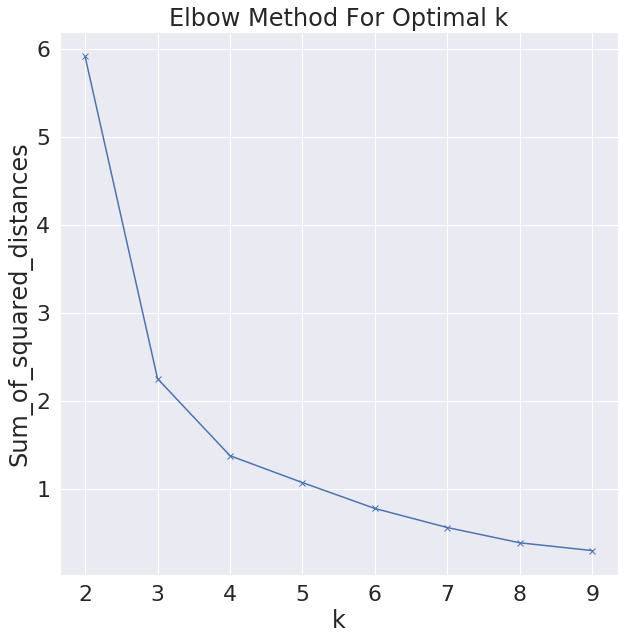

In [8]:
 
plt.plot(K, Sum_of_squared_distances, 'bx-') 
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()


Text(0,0.5,'Score')

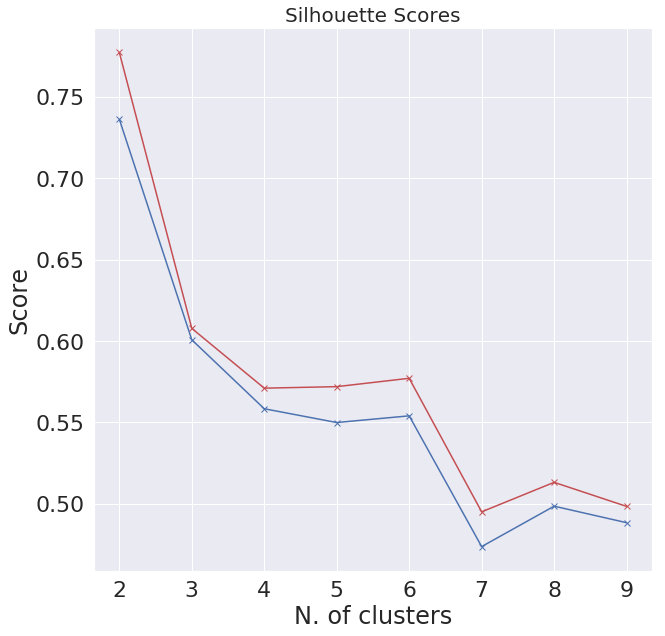

In [9]:

plt.plot(K, sils_euclidean, 'bx-')
plt.plot(K, sils_manhattan, 'rx-')
plt.title("Silhouette Scores", fontsize=20)
plt.xticks(K)
plt.xlabel("N. of clusters")
plt.ylabel("Score")

In [10]:
# cluster_k = 5
# y_pred = KMeans(n_clusters=cluster_k, random_state=111).fit_predict(X_scale)
# coefs_data.loc[coefs_data['cluster']>0, 'cluster'] = y_pred+1
# coefs_data_raw.loc[coefs_data_raw['cluster']>0, 'cluster'] = y_pred+1


In [11]:
from sklearn.mixture import GaussianMixture as GMM
from sklearn import metrics
from sklearn.model_selection import train_test_split
import numpy as np

def SelBest(arr:list, X:int)->list:
    '''
    returns the set of X configurations with shorter distance
    '''
    dx=np.argsort(arr)[:X]
    return arr[dx]


#Courtesy of https://stackoverflow.com/questions/26079881/kl-divergence-of-two-gmms. 
#Here the difference is that we take the squared root, so it's a proper metric

def gmm_js(gmm_p, gmm_q, n_samples=10**5):
    X = gmm_p.sample(n_samples)[0]
    log_p_X = gmm_p.score_samples(X)
    log_q_X = gmm_q.score_samples(X)
    log_mix_X = np.logaddexp(log_p_X, log_q_X)

    Y = gmm_q.sample(n_samples)[0]
    log_p_Y = gmm_p.score_samples(Y)
    log_q_Y = gmm_q.score_samples(Y)
    log_mix_Y = np.logaddexp(log_p_Y, log_q_Y)

    return np.sqrt((log_p_X.mean() - (log_mix_X.mean() - np.log(2))
            + log_q_Y.mean() - (log_mix_Y.mean() - np.log(2))) / 2)


n_clusters=np.arange(2, 10)

sils=[]
sils_err=[]

bics=[]
bics_err=[]

js_dist=[]
js_err=[]

iterations=20
for n in n_clusters:
    print(n)
    
    tmp_sil=[]
    tmp_bic=[]
    tmp_dist=[]
    
    for itr in range(iterations):
        #print(itr)
        
        gmm=GMM(n, n_init=20).fit(X_scale) 
        labels=gmm.predict(X_scale)
        sil=metrics.silhouette_score(X_scale, labels, metric='manhattan')
        tmp_sil.append(sil)
        tmp_bic.append(gmm.bic(X_scale))
        
        train, test=train_test_split(X_scale, test_size=0.5)
        
        gmm_train=GMM(n, n_init=20).fit(train) 
        gmm_test=GMM(n, n_init=20).fit(test) 
        tmp_dist.append(gmm_js(gmm_train, gmm_test))
        
    val=np.mean(SelBest(np.array(tmp_dist), int(iterations/5)))
    err=np.std(tmp_dist)
    js_dist.append(val)
    js_err.append(err)
        
    val=np.mean(SelBest(np.array(tmp_bic), int(iterations/5)))
    err=np.std(tmp_bic)
    bics.append(val)
    bics_err.append(err)
    
    val=np.mean(SelBest(np.array(tmp_sil), int(iterations/5)))
    err=np.std(tmp_sil)
    sils.append(val)
    sils_err.append(err)
    

2
3
4
5
6
7
8
9


Text(0,0.5,'Score')

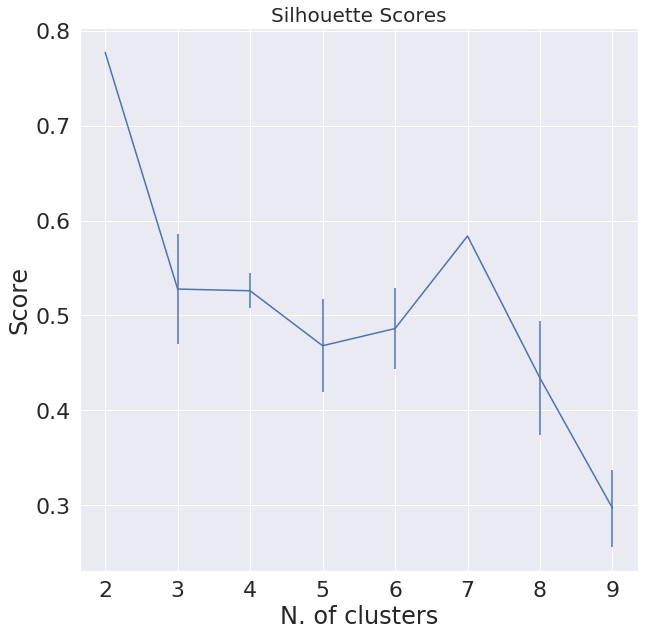

In [12]:
plt.errorbar(n_clusters, sils, yerr=sils_err)
plt.title("Silhouette Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("Score")

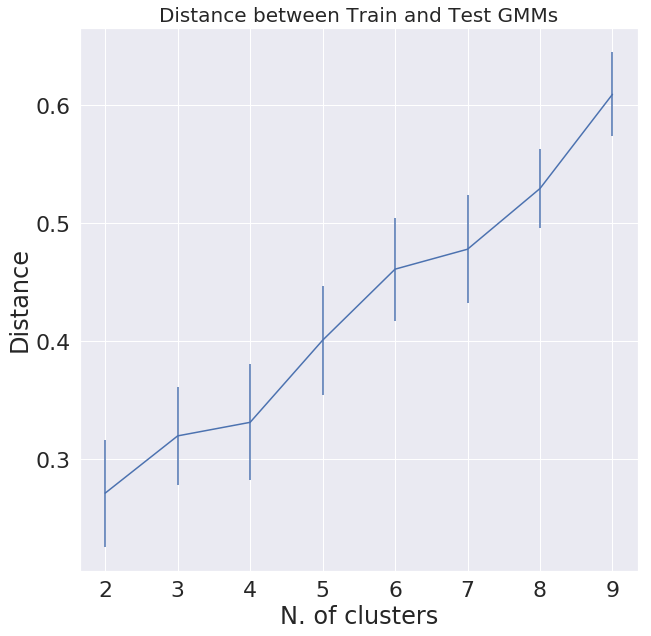

In [13]:

plt.errorbar(n_clusters, js_dist, yerr=js_err)
plt.title("Distance between Train and Test GMMs", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("Distance")
plt.show()

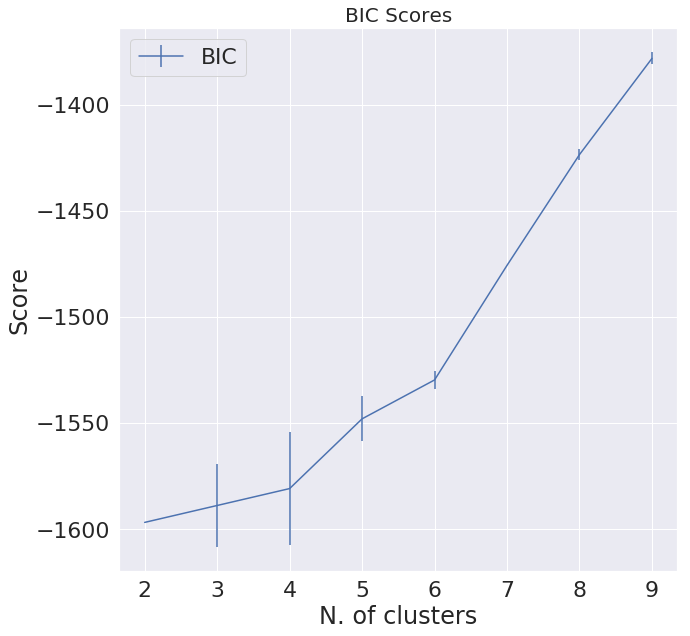

In [14]:
plt.errorbar(n_clusters,bics, yerr=bics_err, label='BIC')
plt.title("BIC Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("Score")
plt.legend()

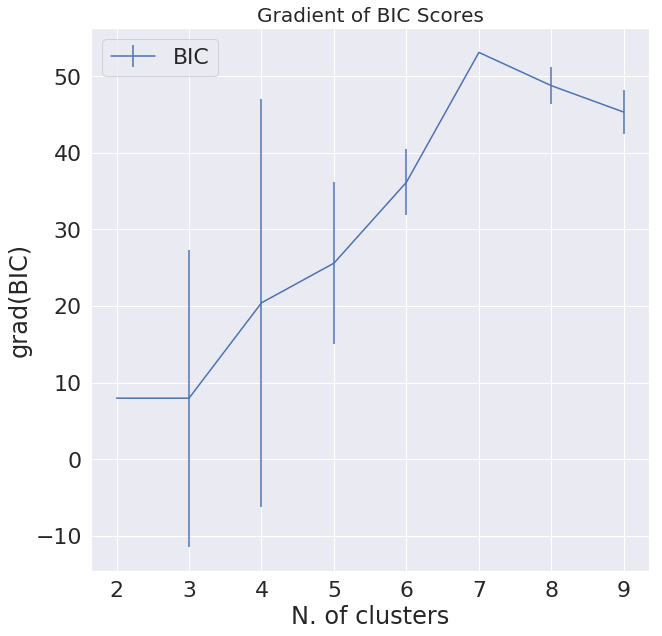

In [15]:
plt.errorbar(n_clusters, np.gradient(bics), yerr=bics_err, label='BIC')
plt.title("Gradient of BIC Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("grad(BIC)")
plt.legend()

In [16]:


from sklearn.metrics.cluster import contingency_matrix

def align_cluster_index(ref_cluster, map_cluster):
    """
    remap cluster index according the the ref_cluster.
    both inputs must have same number of unique cluster index values.
    """
    
    ref_values = np.unique(ref_cluster)
    map_values = np.unique(map_cluster)
    
    if ref_values.shape[0]!=map_values.shape[0]:
        print('error: both inputs must have same number of unique cluster index values.')
        return()
    
    cont_mat = contingency_matrix(ref_cluster, map_cluster)
    num_rows = len(cont_mat)
    
    cont_mat_col_sum = np.matmul(np.ones((num_rows, 1)), np.sum(cont_mat, axis = 0).reshape(1, num_rows))
    cont_mat_row_sum = np.matmul(np.sum(cont_mat, axis = 1).reshape(num_rows, 1), np.ones((1, num_rows)))
    cont_mat = cont_mat*2/(cont_mat_col_sum + cont_mat_row_sum)
    print(cont_mat)
    
    sort_0 = np.argsort(cont_mat, axis = 0)
    sort_1 = np.argsort(cont_mat, axis = 1)
    
    for i_row in range(len(cont_mat)):
        # switch values:
        cluster_tmp = map_cluster
        map_cluster[cluster_tmp==map_values[sort_1[i_row,-1]]]=ref_values[i_row]
        map_cluster[cluster_tmp==map_values[i_row]]=ref_values[sort_1[i_row,-1]]
            
    
    return(map_cluster)
    

In [17]:

np.set_printoptions(threshold=1000)
cluster_k = 5

############# K means #####################

km = KMeans(n_clusters=cluster_k, n_init=20)
km = km.fit(X_scale)
km_cluster = km.predict(X_scale)


############# GMM #########################


repetition = 10
y_pred = np.zeros((X_scale.shape[0], repetition))+1111

for i in range(repetition):

    dpgmm = GMM(n_components=cluster_k, n_init = 50, covariance_type='full', random_state = i).fit(X_scale)
    y_pred[:, i] = dpgmm.predict(X_scale)

print(y_pred)

for i in range(1, repetition):
    y_pred_i = align_cluster_index(y_pred[:,0], y_pred[:,i])
    y_pred[:,i]=y_pred_i
    
print(y_pred)

y_pred_consistent = np.zeros(X_scale.shape[0])+110
for ik in range(cluster_k):
    ik_count = np.sum(y_pred==ik, axis = 1)
#     print(ik_count)
    y_pred_consistent[ik_count>=7]=ik
    
    
    

[[3. 1. 4. 4. 4. 3. 4. 4. 2. 4.]
 [0. 0. 0. 0. 2. 0. 0. 0. 1. 0.]
 [3. 1. 4. 4. 4. 3. 4. 4. 2. 4.]
 [0. 0. 0. 0. 2. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 2. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 2. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 2. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 2. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 2. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 2. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 2. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 2. 0. 0. 0. 1. 0.]
 [1. 3. 1. 1. 1. 1. 1. 3. 4. 1.]
 [0. 0. 0. 0. 2. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 2. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 2. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 2. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 2. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 2. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 2. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 2. 0. 0. 0. 1. 0.]
 [1. 3. 1. 1. 1. 1. 1. 3. 4. 1.]
 [2. 2. 3. 2. 0. 2. 3. 2. 3. 3.]
 [2. 2. 3. 2. 0. 0. 3. 0. 3. 3.]
 [0. 0. 0. 0. 2. 0. 0. 0. 1. 0.]
 [0. 0. 0. 2. 0. 0. 0. 0. 3. 0.]
 [2. 2. 3. 3. 3. 2. 3. 2. 0. 3.]
 [0. 0. 0. 0. 2. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 2. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 2. 0. 0. 0. 1. 0.]
 [0. 0. 0.

In [32]:
coefs_data.loc[cluster_rows, 'cluster'] = km_cluster+1
coefs_data_raw.loc[cluster_rows, 'cluster'] = km_cluster+1


# coefs_data.loc[cluster_rows, 'cluster'] = y_pred_consistent+1
# coefs_data_raw.loc[cluster_rows, 'cluster'] = y_pred_consistent+1



In [33]:
y_pred_consistent.shape
coefs_data.loc[coefs_data['cluster']==111, 'cluster'].shape

(0,)

In [34]:
pd.set_option('display.max_rows', 500)

# clusters with R square less than thresh:
print(coefs_data_raw.loc[coefs_data['cluster']==999,:].shape)
coefs_data_raw.loc[coefs_data['cluster']==999,:]

(118, 11)


,Unnamed: 0,modality,beta1,beta2,beta3,beta4,beta5,Rsquare,cluster,peak_age_m,peak_age_f
0,Left Precentral,gmv,-0.208754,0.000000,0.000000,0.000000,0.000000,-0.839810,999.0,inf,inf
1,Right Precentral,gmv,-0.226059,0.000000,0.000000,0.000000,0.000000,-2.166871,999.0,inf,inf
2,Left Superior Frontal,gmv,-0.209297,0.000000,0.000000,0.000000,0.000000,-1.567512,999.0,inf,inf
3,Right Superior Frontal,gmv,0.000000,0.000000,0.000000,0.000000,0.000000,-2.762282,999.0,NaN,NaN
5,Right Superior Frontal Orbital,gmv,0.000000,0.000000,0.000000,0.000000,0.000000,-7.649465,999.0,NaN,NaN
6,Left Middle Frontal,gmv,-0.258319,0.000000,0.000000,0.000000,0.000000,-2.977686,999.0,inf,inf
9,Right Middle Frontal Orbital,gmv,-0.320013,0.006960,1.178647,0.000000,0.000000,-1.888659,999.0,22.989945,22.989945
14,Left Inferior Frontal Orbital,gmv,-0.304212,0.000000,0.000000,0.000000,0.000000,-3.573350,999.0,inf,inf
18,Left Superior Motor,gmv,-0.242174,0.000000,0.000000,0.000000,0.000000,-3.183499,999.0,inf,inf
19,Right Superior Motor,gmv,-0.245223,0.000000,0.000000,0.000000,0.000000,-2.870332,999.0,inf,inf


In [35]:
pd.set_option('display.max_rows', 500)

# clusters with R squared higher than threshold but consistent index:
print(coefs_data_raw.loc[coefs_data['cluster']==111,:].shape)
coefs_data_raw.loc[coefs_data['cluster']==111,:]

(0, 11)


,Unnamed: 0,modality,beta1,beta2,beta3,beta4,beta5,Rsquare,cluster,peak_age_m,peak_age_f


/home/xin/environments/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/xin/environments/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


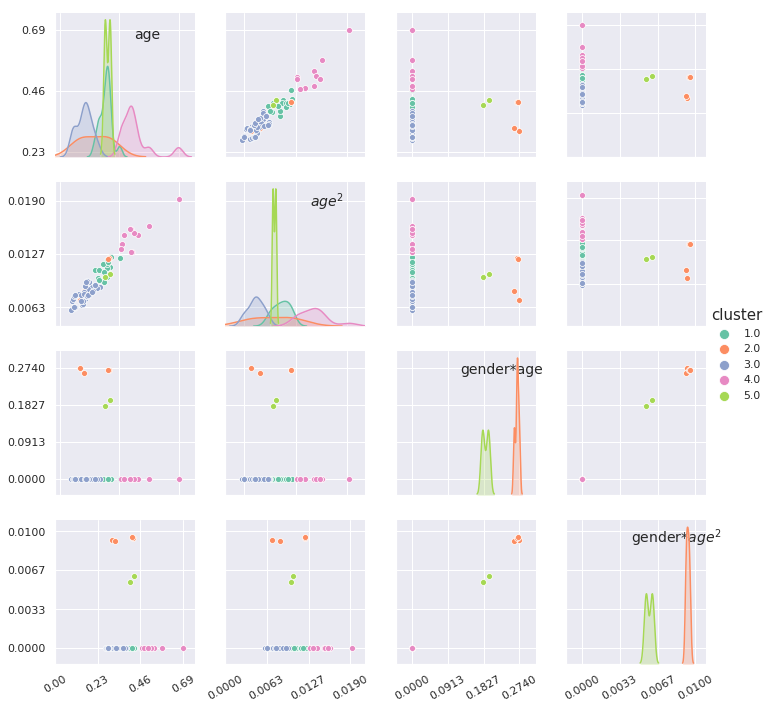

In [36]:
# make pair plots:
sns.set(rc={'figure.figsize':(12, 12)}, font_scale = 1)
import numpy as np

plot_data = coefs_data.loc[coefs_data['cluster']<10, :]

# change cluster index
# coefs_data.replace({'cluster': {1: 11, 2: 12, 3:13, 4: 14}}, inplace = True)
# coefs_data.replace({'cluster': {12: 1, 14: 2, 11: 3, 13: 4}}, inplace = True)

# plt.figure()
g = sns.pairplot(plot_data, kind="scatter", hue="cluster",
                 vars=['beta1', 'beta2', 'beta4', 'beta5'], palette="Set2")

text_size = 14
g.axes[0, 0].text(max(plot_data[columns[0]])*.75, 
                  max(plot_data[columns[0]])*.95, 
                  'age', fontsize = text_size)
g.axes[1, 1].text(max(plot_data[columns[1]])*.75, 
                  max(plot_data[columns[1]])*.95, 
                  '$age^2$', fontsize = text_size)
g.axes[2, 2].text(max(plot_data[columns[2]])*.45, 
                  max(plot_data[columns[2]])*.95, 
                  'gender*age', fontsize = text_size)
g.axes[3, 3].text(max(plot_data[columns[3]])*.45, 
                  max(plot_data[columns[3]])*.95, 
                  'gender*$age^2$', fontsize = text_size)


num_vars = len(columns)

for idx in range(num_vars):
    g.axes[num_vars-1, idx].set_xlabel('')
    g.axes[idx, 0].set_ylabel('')


for idx1 in range(num_vars):
    for idx2 in range(num_vars):
        offset1 = (max(plot_data.loc[:, columns[idx1]]) - 
                   min(plot_data.loc[:, columns[idx1]]))*.15
        offset2 = (max(plot_data.loc[:, columns[idx2]]) - 
                   min(plot_data.loc[:, columns[idx2]]))*.15
        
        limit_idx1 = [min(plot_data.loc[:, columns[idx1]])-offset1, 
                      max(plot_data.loc[:, columns[idx1]])+offset1]
        
        limit_idx2 = [min(plot_data.loc[:, columns[idx2]])-offset2,
                      max(plot_data.loc[:, columns[idx2]])+offset2]
        
        g.axes[idx1, idx2].set_ylim(limit_idx1[0], limit_idx1[1])
        g.axes[idx1, idx2].set_yticks(np.round(np.linspace(0, round(limit_idx1[1]-offset1,3), num=4), 4))
        
        g.axes[idx1, idx2].set_xlim(limit_idx2[0], limit_idx2[1])
        g.axes[idx1, idx2].set_xticks(np.round(np.linspace(0, round(limit_idx2[1]-offset2,3), num=4), 4))
        
        if idx1==num_vars-1:
            #g.axes[idx1, idx2].set_xticklabels(g.axes[idx1, idx2].get_xticklabels(), rotation=30)
            plt.setp(g.axes[idx1, idx2].get_xticklabels(), rotation=30)
    

# ticks = g.axes[3][1].get_xticks()
# xlabels = ['{:1.1e}'.format(x) for x in ticks]
# g.axes[3][1].set_xticklabels(xlabels)
# g.axes[1][3].set_yticklabels(xlabels)

plt.setp(g._legend.get_title(), fontsize=15)


for lh in g._legend.legendHandles: 
    lh.set_alpha(1)
    lh._sizes = [100] 

plt.show()


In [37]:
coefs_summary = coefs_data_raw.groupby('cluster').mean()
print(coefs_summary.columns)
coefs_summary.columns = ['age', 'age$^2$', 'gender', 'gender*age', 'gender*age$^2$',\
                         'R$^2$','Peak age(M)','Peak age(F)']
coefs_summary

Index(['beta1', 'beta2', 'beta3', 'beta4', 'beta5', 'Rsquare', 'peak_age_m',
       'peak_age_f'],
      dtype='object')


,age,age$^2$,gender,gender*age,gender*age$^2$,R$^2$,Peak age(M),Peak age(F)
cluster,,,,,,,,
1.0,0.068762,-0.002490,0.000000,0.000000,0.000000,0.251845,18.666928,18.666928
2.0,0.051621,-0.002217,1.846878,-0.268167,0.009351,0.177600,22.583132,-2.082610
3.0,-0.232384,0.005276,0.000000,0.000000,0.000000,0.284449,20.919681,20.919681
4.0,0.108167,-0.003871,0.000000,0.000000,0.000000,0.253595,17.500750,17.500750
5.0,-0.414883,0.010088,1.425851,-0.187877,0.005929,0.448363,18.815238,27.312941
999.0,0.007015,-0.001672,0.168769,-0.018530,0.000694,-2.447456,NaN,NaN


In [38]:
coefs_data.to_csv(result_dir+'/out02_coefs_cluster_gmm.csv')

In [39]:
print(coefs_data_raw.loc[coefs_data['cluster']==1,:].shape)
coefs_data_raw.loc[coefs_data['cluster']==1,:].sort_values(by='Rsquare', ascending=False)


(17, 11)


,Unnamed: 0,modality,beta1,beta2,beta3,beta4,beta5,Rsquare,cluster,peak_age_m,peak_age_f
15,Right Inferior Frontal Orbital,gmv,-0.402035,0.009275,0.0,0.0,0.0,0.461597,1.0,21.672698,21.672698
63,Right Supramarginal,gmv,-0.413134,0.009863,0.0,0.0,0.0,0.391293,1.0,20.943181,20.943181
61,Right Inferior Parietal,gmv,-0.418082,0.010252,0.0,0.0,0.0,0.388990,1.0,20.391118,20.391118
85,Right Middle Temporal,gmv,-0.382751,0.009566,0.0,0.0,0.0,0.364213,1.0,20.006614,20.006614
84,Left Middle Temporal,gmv,-0.461601,0.012156,0.0,0.0,0.0,0.360754,1.0,18.985832,18.985832
73,Right Putamen,gmv,-0.424093,0.011175,0.0,0.0,0.0,0.315663,1.0,18.974259,18.974259
72,Left Putamen,gmv,-0.378034,0.009817,0.0,0.0,0.0,0.302904,1.0,19.253978,19.253978
171,Cingulum.(cingulate.gyrus).R,tract_fa,0.401189,-0.010496,0.0,0.0,0.0,0.264808,1.0,19.112303,19.112303
150,Cingulum.(cingulate.gyrus).R,label_fa,0.413813,-0.011050,0.0,0.0,0.0,0.264685,1.0,18.723920,18.723920
167,Anterior.thalamic.radiation.R,tract_fa,0.414035,-0.011503,0.0,0.0,0.0,0.183267,1.0,17.996167,17.996167


## Vermis

Lesions to the vermis commonly give rise to clinical depression, inappropriate emotional displays (e.g. unwarranted giggling) in addition to movement disorders.

## Cerebellum

In humans, the cerebellum plays an important role in motor control. It may also be involved in some cognitive functions such as attention and language as well as in regulating fear and pleasure responses.

Functional imaging studies have shown cerebellar activation in relation to language, attention, and mental imagery;; and a variety of non-motor symptoms have been recognized in people with damage that appears to be confined to the cerebellum. In particular, the cerebellar cognitive affective syndrome or Schmahmann's syndrome has been described in adults and children.

## Fusiform

Though the functionality of the fusiform gyrus is not fully understood, it has been linked with various neural pathways related to recognition. Additionally, it has been linked to various neurological phenomena such as synesthesia, dyslexia, and prosopagnosia.

## Inferior Occipital

Face processing
https://www.sciencedirect.com/science/article/pii/S0010945214000781

## corticospinal tract

The corticospinal tract is a white matter motor pathway starting at the cerebral cortex that terminates on lower motor neurons and interneurons in the spinal cord, controlling movements of the limbs and trunk.

## Superior Parietal

The superior parietal lobule is involved with spatial orientation, and receives a great deal of visual input as well as sensory input from one's hand.

There are major white matter pathway connections with the superior parietal lobule such as the Cingulum.

## external capsule
The white matter of the external capsule contains fibers known as corticocortical association fibers. These fibers are responsible for connecting the cerebral cortex to another cortical area.

## Superior Temporal Pole	

The superior temporal gyrus also includes the Wernicke's area, which (in most people) is located in the left hemisphere. It is the major area involved in the comprehension of language. The superior temporal gyrus is involved in auditory processing, including language, but also has been implicated as a critical structure in social cognition.

Social concepts
https://www.pnas.org/content/104/15/6430.short



In [40]:
print(coefs_data_raw.loc[coefs_data['cluster']==2,:].shape)
coefs_data_raw.loc[coefs_data['cluster']==2,:].sort_values(by='Rsquare', ascending=False)

(4, 11)


,Unnamed: 0,modality,beta1,beta2,beta3,beta4,beta5,Rsquare,cluster,peak_age_m,peak_age_f
45,Right Cuneus,gmv,-0.307783,0.007126,2.021113,-0.273970,0.009274,0.320312,2.0,17.736343,-7.868426
176,Inferior.fronto-occipital.fasciculus.L,tract_fa,0.417100,-0.012080,1.812488,-0.269317,0.009518,0.139408,2.0,28.841857,15.891284
161,Inferior.fronto-occipital.fasciculus.L,label_fa,0.418173,-0.012182,1.826985,-0.268243,0.009415,0.137344,2.0,27.089678,15.891284
59,Right Superior Parietal,gmv,-0.321006,0.008269,1.726927,-0.261138,0.009197,0.113336,2.0,16.664647,-32.244581


## Left inferior frontal 

Language comprehension and production

The left IFG has also been suggested to play a role in inhibitory processes, including the tendency to inhibit learning from undesirable information. For example, transcranial magnetic stimulation to the left IFG has been shown to release such inhibition, increasing the ability to learn from undesirable information.

Inhibition executive control
https://www.sciencedirect.com/science/article/pii/S1364661304000531

Top-down modulation of visual feature processing
https://www.sciencedirect.com/science/article/pii/S1053811910008566

## Left Middle Frontal	

Social anxiety disorder
https://europepmc.org/abstract/med/27680692

https://www.frontiersin.org/articles/10.3389/fnsys.2015.00023/full

## Cingulum
There are two primary parts of the cingulate cortex: the posterior cingulate cortex and the anterior cingulate cortex. The anterior is linked to emotion, especially apathy and depression. Here function and structure changes are related meaning any change within this structure would lead to a function change, particularly behavioral because of its function involving emotions. Damage to this area can have various effects on mental disorders and mental health. The posterior section is more related to cognitive functions. This can include attention, visual and spatial skills, working memory and general memory. Because of its location, the cingulum is very important to brain structure connectivity and the integration of information that it receives.


## Superior Occipital
The ventral stream is known for the processing the "what" in vision, while the dorsal stream handles the "where/how." This is because the ventral stream provides important information for the identification of stimuli that are stored in memory. With this information in memory, the dorsal stream is able to focus on motor actions in response to the outside stimuli.

## caudate

While the caudate nucleus has long been associated with motor processes due to its role in Parkinson's disease, it plays important roles in various other nonmotor functions as well, including procedural learning, associative learning and inhibitory control of action, among other functions. The caudate is also one of the brain structures which compose the reward system and functions as part of the cortico–basal ganglia–thalamic loop.




In [41]:
pd.set_option('display.max_rows', 500)
print(coefs_data_raw.loc[coefs_data['cluster']==3,:].shape)
coefs_data_raw.loc[coefs_data['cluster']==3,:].sort_values(by='Rsquare', ascending=False)

(34, 11)


,Unnamed: 0,modality,beta1,beta2,beta3,beta4,beta5,Rsquare,cluster,peak_age_m,peak_age_f
12,Left Inferior Frontal,gmv,-0.316557,0.006518,0.0,0.0,0.0,0.480026,3.0,24.283766,24.283766
80,Left Superior Temporal,gmv,-0.355211,0.008097,0.0,0.0,0.0,0.437871,3.0,21.934164,21.934164
17,Right Rolandic Operculum,gmv,-0.319646,0.006671,0.0,0.0,0.0,0.416249,3.0,23.958836,23.958836
7,Right Middle Frontal,gmv,-0.365043,0.008709,0.0,0.0,0.0,0.412228,3.0,20.957168,20.957168
76,Left Thalamus,gmv,-0.336663,0.007737,0.0,0.0,0.0,0.405075,3.0,21.758067,21.758067
13,Right Inferior Frontal,gmv,-0.332189,0.007602,0.0,0.0,0.0,0.403357,3.0,21.848741,21.848741
56,Left Postcentral,gmv,-0.383350,0.008684,0.0,0.0,0.0,0.399260,3.0,22.071657,22.071657
16,Left Rolandic Operculum,gmv,-0.341366,0.007797,0.0,0.0,0.0,0.392584,3.0,21.889490,21.889490
62,Left Supramarginal,gmv,-0.375040,0.008642,0.0,0.0,0.0,0.389010,3.0,21.697505,21.697505
10,Left Inferior Frontal Operculum,gmv,-0.328204,0.007339,0.0,0.0,0.0,0.354475,3.0,22.359027,22.359027


## superior temporal

The superior temporal gyrus has been involved in the perception of emotions in facial stimuli.[2] [4]) Furthermore, the superior temporal gyrus is an essential structure involved in auditory processing, as well as in the function of language in individuals who may have an impaired vocabulary, or are developing a sense of language. The superior temporal gyrus has been discovered to be an important structure in the pathway consisting of the amygdala and prefrontal cortex, which are all involved in social cognition processes.


## caudate

While the caudate nucleus has long been associated with motor processes due to its role in Parkinson's disease, it plays important roles in various other nonmotor functions as well, including procedural learning, associative learning and inhibitory control of action, among other functions. The caudate is also one of the brain structures which compose the reward system and functions as part of the cortico–basal ganglia–thalamic loop.

## putamen

The putamen is interconnected with many other structures, and works in conjunction with them to influence many types of motor behaviors. These include motor planning, learning, and execution, motor preparation, specifying amplitudes of movement, and movement sequences.

In [42]:
print(coefs_data.loc[coefs_data['cluster']==4,:].shape)
coefs_data.loc[coefs_data['cluster']==4,:].sort_values(by='Rsquare', ascending=False)

(11, 9)


,Unnamed: 0,modality,beta1,beta2,beta3,beta4,beta5,Rsquare,cluster
81,Right Superior Temporal,gmv,0.504162,0.012905,0.0,0.0,0.0,0.458073,4.0
60,Left Inferior Parietal,gmv,0.510267,0.012896,0.0,0.0,0.0,0.399957,4.0
74,Left Pallidum,gmv,0.690376,0.019302,0.0,0.0,0.0,0.395224,4.0
66,Left Precuneus,gmv,0.575320,0.015986,0.0,0.0,0.0,0.352973,4.0
132,Anterior.limb.of.internal.capsule.R,label_fa,0.532911,0.014948,0.0,0.0,0.0,0.282450,4.0
133,Anterior.limb.of.internal.capsule.L,label_fa,0.466688,0.013272,0.0,0.0,0.0,0.240701,4.0
175,Forceps.minor,tract_fa,0.515840,0.015228,0.0,0.0,0.0,0.173317,4.0
118,Genu.of.corpus.callosum,label_fa,0.469533,0.013905,0.0,0.0,0.0,0.158779,4.0
177,Inferior.fronto-occipital.fasciculus.R,tract_fa,0.502375,0.015655,0.0,0.0,0.0,0.118388,4.0
160,Inferior.fronto-occipital.fasciculus.R,label_fa,0.504527,0.015659,0.0,0.0,0.0,0.117427,4.0


## Rectus
    
A specific function for the straight gyrus has not yet been brought to light; however, in males, greater activation of the straight gyrus within the medial orbitofrontal cortex while observing sexually visual pictures has been strongly linked to HSDD (hypoactive sexual desire disorder)

## Anterior cingulate gyrus
    
It is an integral part of the limbic system, which is involved with **emotion formation** and **processing**, **learning and memory**. It also plays a role in executive function and respiratory control.

Takahashi et al. (2003) found that the rostral anterior cingulate gyrus is larger in control (healthy) females than males, but this sex difference was not found in people with **schizophrenia**. People with schizophrenia also had a smaller volume of perigenual cingulate gyrus than control subjects

## hippocampus

The hippocampus is part of the limbic system, and plays important roles in the **consolidation of information from short-term memory to long-term memory**, and in **spatial memory** that enables navigation.

The hippocampus contains high levels of glucocorticoid receptors, which make it more vulnerable to long-term stress than most other brain areas. There is evidence that humans having experienced severe, long-lasting traumatic stress show atrophy of the hippocampus more than of other parts of the brain. These effects show up in **post-traumatic stress disorder**, and they may contribute to the hippocampal atrophy reported in **schizophrenia**. and severe **depression**. A recent study has also revealed atrophy as a result of **depression**, but this can be stopped with anti-depressants even if they are not effective in relieving other symptoms.

## corona radiata

Evidence from subcortical small infarcts suggests that motor fibers are somatotopically arranged in the human corona radiata.

## cuneus

In addition to its traditional role as a site for basic **visual processing**, gray matter volume in the cuneus is associated with better **inhibitory control** in **bipolar depression** patients. Pathologic gamblers have higher activity in the dorsal visual processing stream including the cuneus relative to controls.

## Middle occipital
The occipital lobe is the visual processing center of the mammalian brain containing most of the anatomical region of the visual cortex.

## Superior Parietal

The superior parietal lobule is involved with spatial orientation, and receives a great deal of visual input as well as sensory input from one's hand.

There are major white matter pathway connections with the superior parietal lobule such as the Cingulum.

In [43]:
print(coefs_data.loc[coefs_data['cluster']==5,:].shape)
coefs_data.loc[coefs_data['cluster']==5,:].sort_values(by='Rsquare', ascending=False)

(2, 9)


,Unnamed: 0,modality,beta1,beta2,beta3,beta4,beta5,Rsquare,cluster
8,Left Middle Frontal Orbital,gmv,0.405658,0.009920,1.401706,0.180643,0.005660,0.452863,5.0
4,Left Superior Frontal Orbital,gmv,0.424109,0.010257,1.449996,0.195111,0.006199,0.443864,5.0


In [44]:
# print(coefs_data.loc[coefs_data['cluster']==6,:].shape)
# coefs_data.loc[coefs_data['cluster']==6,:].sort_values(by='Rsquare', ascending=False)

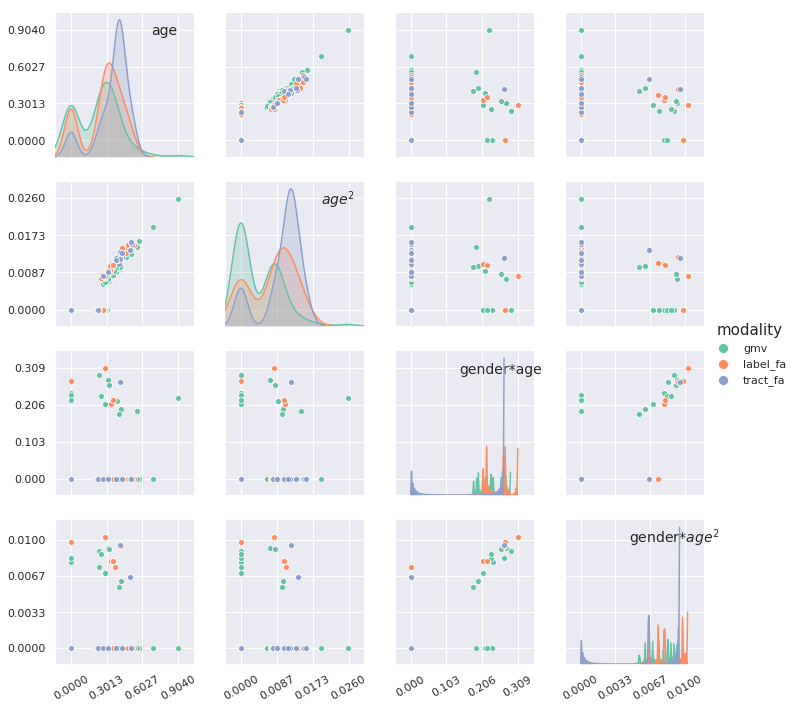

In [45]:
sns.set(rc={'figure.figsize':(10, 10)}, font_scale = 1)

row_idx = coefs_data['cluster']>0
g = sns.pairplot(coefs_data.loc[row_idx,:], kind="scatter", hue="modality",
                 vars=['beta1', 'beta2', 'beta4', 'beta5'], palette="Set2")

text_size = 14
g.axes[0, 0].text(max(coefs_data.loc[row_idx, columns[0]])*.75, max(coefs_data.loc[row_idx, columns[0]])*.95, 
                  'age', fontsize = text_size)
g.axes[1, 1].text(max(coefs_data.loc[row_idx, columns[1]])*.75, max(coefs_data.loc[row_idx, columns[1]])*.95, 
                  '$age^2$', fontsize = text_size)
g.axes[2, 2].text(max(coefs_data.loc[row_idx, columns[2]])*.45, max(coefs_data.loc[row_idx, columns[2]])*.95, 
                  'gender*age', fontsize = text_size)
g.axes[3, 3].text(max(coefs_data.loc[row_idx, columns[3]])*.45, max(coefs_data.loc[row_idx, columns[3]])*.95, 
                  'gender*$age^2$', fontsize = text_size)

num_vars = len(columns)

for idx in range(num_vars):
    g.axes[num_vars-1, idx].set_xlabel('')
    g.axes[idx, 0].set_ylabel('')

for idx1 in range(num_vars):
    for idx2 in range(num_vars):
        offset1 = (max(coefs_data.loc[row_idx, columns[idx1]]) - min(coefs_data.loc[row_idx, columns[idx1]]))*.15
        offset2 = (max(coefs_data.loc[row_idx, columns[idx2]]) - min(coefs_data.loc[row_idx, columns[idx2]]))*.15
        
        limit_idx1 = [min(coefs_data.loc[row_idx, columns[idx1]])-offset1, 
                      max(coefs_data.loc[row_idx, columns[idx1]])+offset1]
        
        limit_idx2 = [min(coefs_data.loc[row_idx, columns[idx2]])-offset2,
                      max(coefs_data.loc[row_idx, columns[idx2]])+offset2]
        
        g.axes[idx1, idx2].set_ylim(limit_idx1[0], limit_idx1[1])
        g.axes[idx1, idx2].set_yticks(np.round(np.linspace(0, round(limit_idx1[1]-offset1,3), num=4), 4))
        
        g.axes[idx1, idx2].set_xlim(limit_idx2[0], limit_idx2[1])
        g.axes[idx1, idx2].set_xticks(np.round(np.linspace(0, round(limit_idx2[1]-offset2,3), num=4), 4))
        
        if idx1==num_vars-1:
            #g.axes[idx1, idx2].set_xticklabels(g.axes[idx1, idx2].get_xticklabels(), rotation=30)
            plt.setp(g.axes[idx1, idx2].get_xticklabels(), rotation=30)
    


plt.setp(g._legend.get_title(), fontsize=15)

for lh in g._legend.legendHandles: 
    lh.set_alpha(1)
    lh._sizes = [100] 

plt.show()
